# HMM308
## GAM
### *Joseph Salmon*

Notebook pour le cours "GAM"

In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from os import mkdir, path
import statsmodels.formula.api as smf
from scipy.interpolate import UnivariateSpline
from matplotlib import rc
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, Binarizer
from sklearn.pipeline import make_pipeline

import pandas as pd

%matplotlib inline
np.random.seed(seed=44)

# Plot initialization

In [8]:
plt.close('all')


rc('font', **{'family': 'sans-serif', 'sans-serif': ['Computer Modern Roman']})
params = {'axes.labelsize': 12,
          'font.size': 16,
          'legend.fontsize': 16,
          'text.usetex': True,
          'figure.figsize': (8, 6)}
plt.rcParams.update(params)

sns.set_context("poster")
sns.set_palette("colorblind")
sns.set_style("ticks")
sns.axes_style()

{'axes.axisbelow': True,
 'axes.edgecolor': '.15',
 'axes.facecolor': 'white',
 'axes.grid': False,
 'axes.labelcolor': '.15',
 'axes.spines.bottom': True,
 'axes.spines.left': True,
 'axes.spines.right': True,
 'axes.spines.top': True,
 'figure.facecolor': 'white',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'grid.color': '.8',
 'grid.linestyle': '-',
 'image.cmap': 'rocket',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'text.color': '.15',
 'xtick.bottom': True,
 'xtick.color': '.15',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': '.15',
 'ytick.direction': 'out',
 'ytick.left': True,
 'ytick.right': False}

# Saving settings:


In [9]:
saving = True
figsize = (12, 10)

dirname = "../prebuiltimages/"
imageformat = '.pdf'

if not path.exists(dirname):
    mkdir(dirname)

def my_saving_display(fig, dirname, filename, imageformat):
    """"Saving with personal function."""
    filename = filename.replace('.', 'pt')  # remove "." to avoid floats issues
    if saving is True:
        dirname + filename + imageformat
        image_name = dirname + filename + imageformat
        fig.savefig(image_name)

# Motivating example

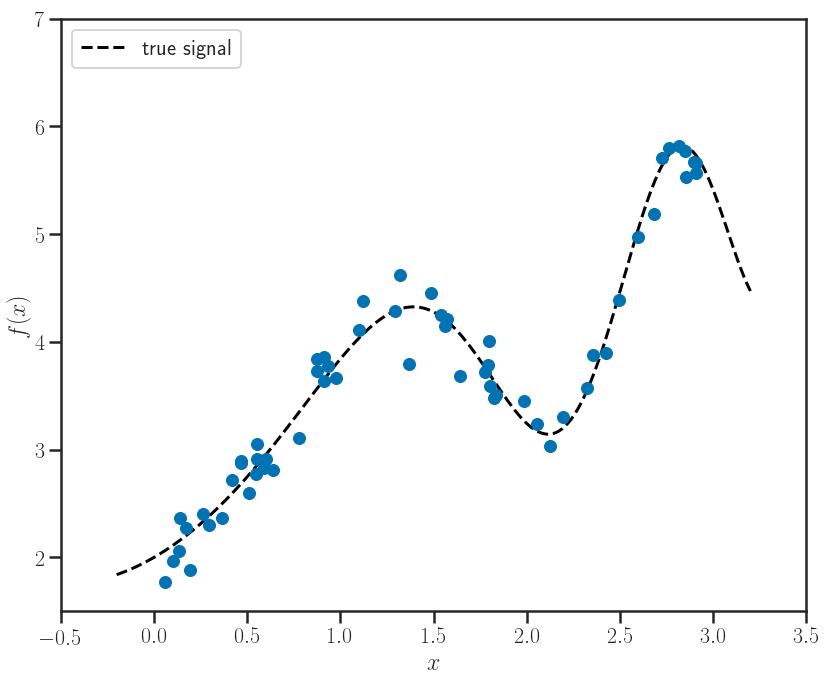

In [10]:
np.random.seed(seed=42)
n_samples = 60
sigma = 0.2  # noise level
x = np.sort(3. * np.random.rand(n_samples))
xx = np.linspace(-.2, 3.2, 200)


def f(x):
    return np.sin(x ** 2) + 2. + x


y = f(x)
y += sigma * np.random.randn(n_samples)

# Ploting Signal / Noise
fig = plt.figure(figsize=figsize)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim([1.5, 7])
plt.xlim([-.5, 3.5])
plt.plot(xx, f(xx), '--k', label="true signal")
plt.legend(loc='upper left')
plt.tight_layout()
my_saving_display(fig, dirname, "sin_signal", imageformat)
plt.plot(x, y, 'o', label="noisy observations")
my_saving_display(fig, dirname, "sin_signal_noisy", imageformat)
plt.show()

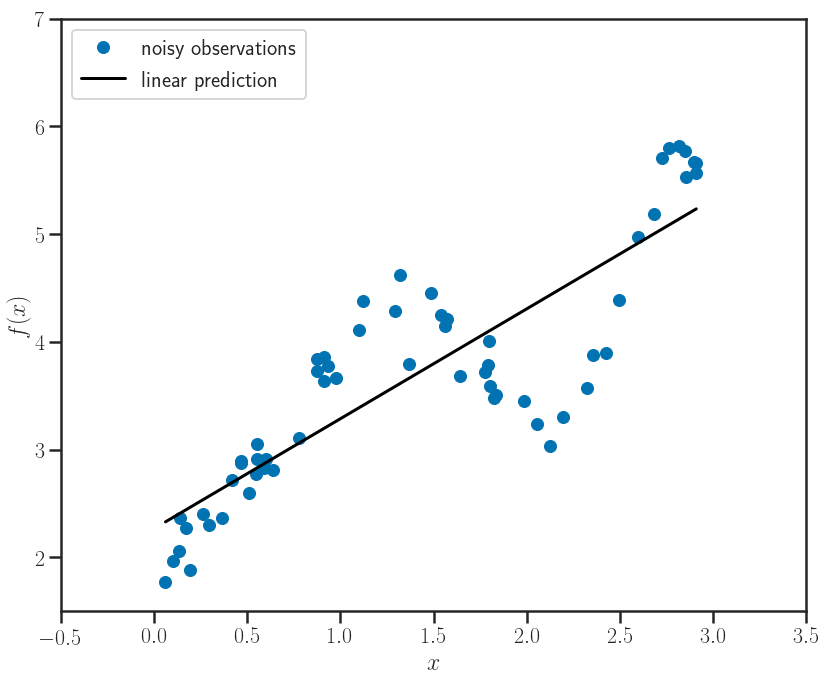

In [11]:
# Performing OLS
X = x[:, np.newaxis]
XX = xx[:, np.newaxis]
ols = LinearRegression(fit_intercept=True)
y_pred = ols.fit(X, y).predict(X)

# Plotting Signal / OLS
fig = plt.figure(figsize=figsize)
plt.plot(x, y, 'o', label="noisy observations")
plt.plot(X, y_pred, '-k', label="linear prediction")
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim([1.5, 7])
plt.xlim([-.5, 3.5])
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

my_saving_display(fig, dirname, "sin_signal_OLS", imageformat)

# Polynomial Regression

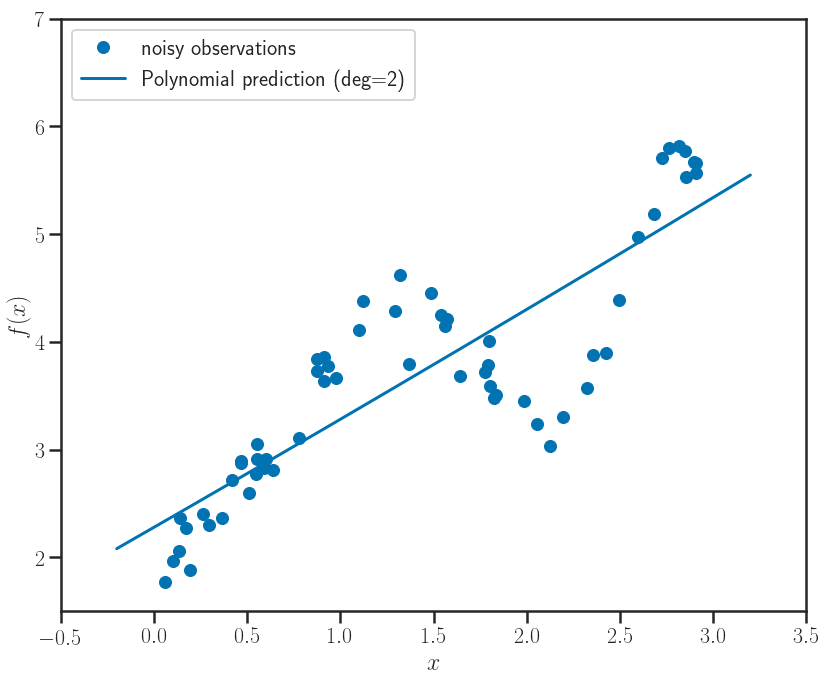

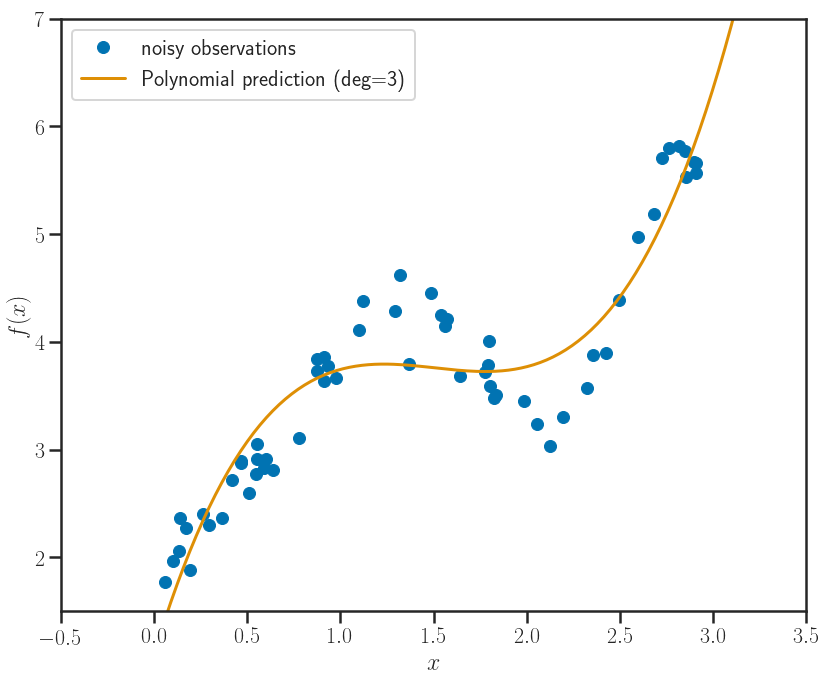

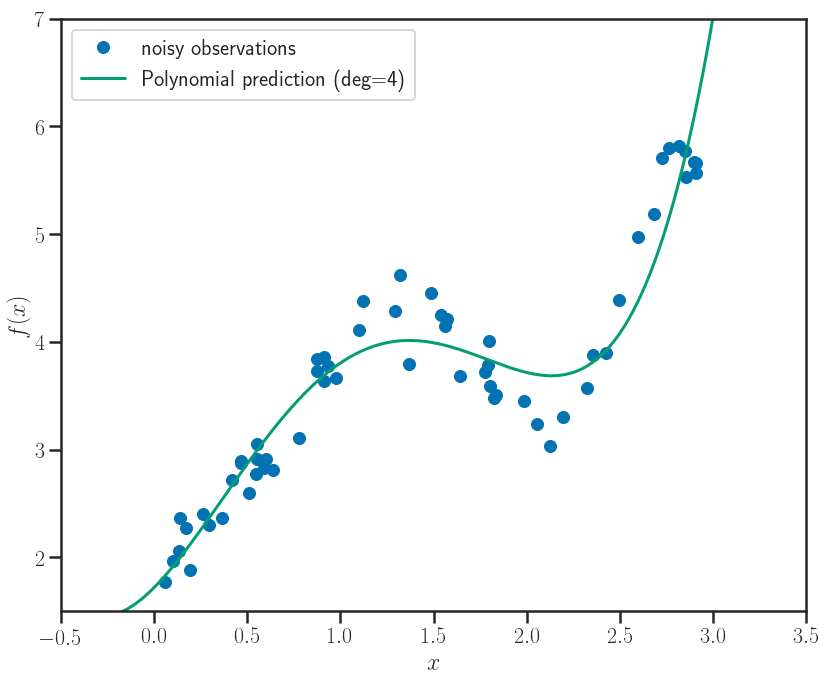

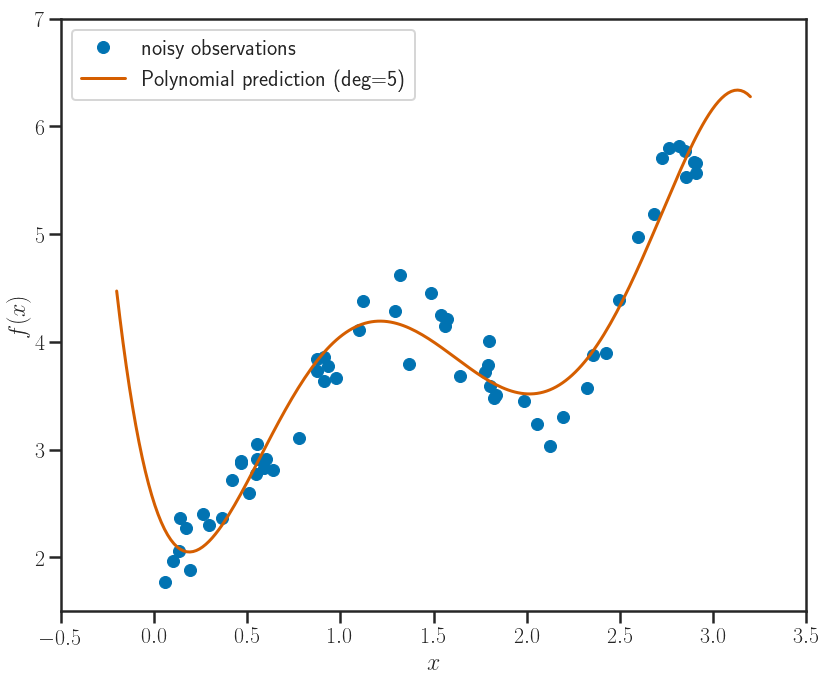

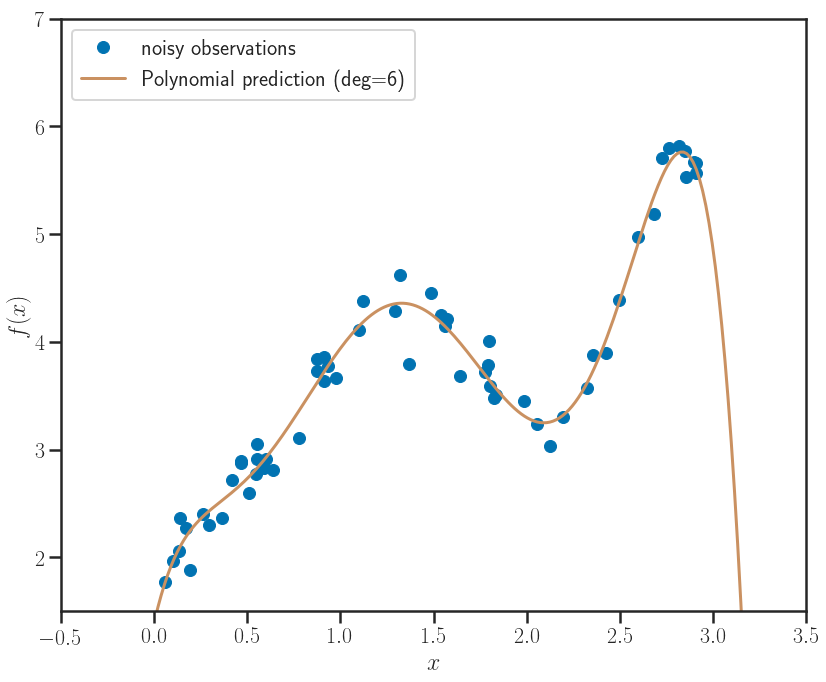

In [12]:
degrees = [2, 3, 4, 5, 6]
colors = [2, 3, 4, 5, 7]

for i, degree in enumerate(degrees):
    # preprocess for creating polynomials on train and test
    poly = PolynomialFeatures(degree)
    X_train = poly.fit_transform(X)
    X_test = poly.fit_transform(XX)

    # Ordinary Least Square step:
    ols = LinearRegression(fit_intercept=True)
    ols.fit(X_train, y)
    y_pred = ols.predict(X_test)

    # Display:
    fig = plt.figure(figsize=figsize)
    plt.plot(x, y, 'o', label="noisy observations")
    plt.plot(xx, y_pred, '-',
             color=sns.color_palette("colorblind", 8)[colors[i] - 2],
             label=r"Polynomial prediction (deg={0})".format(degree))
    plt.xlabel('$x$')
    plt.ylabel('$f(x)$')
    plt.ylim([1.5, 7])
    plt.xlim([-.5, 3.5])
    plt.legend(loc='upper left')
    plt.tight_layout()
    my_saving_display(fig, dirname, "sin_signal_poly" + str(degree),
                      imageformat)
plt.show()

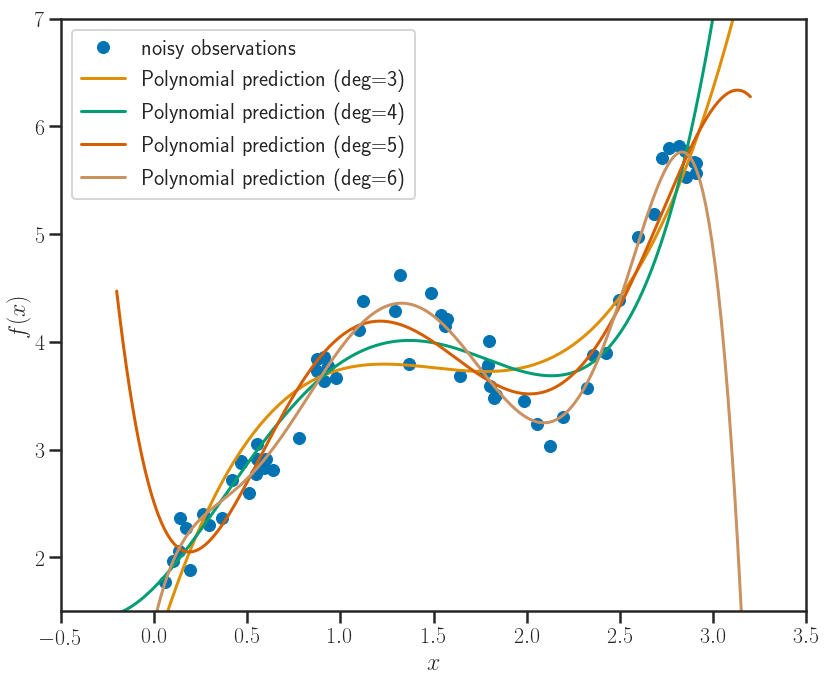

In [13]:
degrees = [3, 4, 5, 6]
colors = [3, 4, 5, 7]

fig2 = plt.figure(figsize=figsize)
plt.plot(x, y, 'o', label="noisy observations")
for i, degree in enumerate(degrees):

    # preprocess for creating polynomials on train and test
    poly = PolynomialFeatures(degree)
    X_train = poly.fit_transform(X)
    X_test = poly.fit_transform(XX)

    # Ordinary Least Square step:
    ols = LinearRegression(fit_intercept=True)
    ols.fit(X_train, y)
    y_pred = ols.predict(X_test)

    plt.plot(xx, y_pred, '-',
             color=sns.color_palette("colorblind", 8)[colors[i] - 2],
             label=r"Polynomial prediction (deg={0})".format(degree))
    plt.xlabel('$x$')
    plt.ylabel('$f(x)$')
    plt.ylim([1.5, 7])
    plt.xlim([-.5, 3.5])
    plt.legend(loc='upper left')
    plt.tight_layout()
plt.show()
my_saving_display(fig2, dirname, "sin_signal_poly_all", imageformat)

In [14]:
# defining a class for Polynonial Regression


class PolynomialRegression(LinearRegression):
    """PolynomialRegression Class, to perform for instance CV"""

    def __init__(self, degree=2):
        super(PolynomialRegression, self).__init__()
        self.degree = degree
        self.fit_intercept = True

    def fit(self, X, y, degree=None):
        # preprocess for creating polynomial on train and test
        poly = PolynomialFeatures(self.degree)
        X_train = poly.fit_transform(X)

        super(PolynomialRegression, self).fit(X_train, y)
        return self

    def predict(self, X):
        poly = PolynomialFeatures(self.degree)
        X_test = poly.fit_transform(X)
        return super(PolynomialRegression, self).predict(X_test)

(60, 1)
[2.9877972029388356, 2.9296193603906002, 2.1899671188676773, 18.459647419446934, 3.9114616344771016, 16.3053039973548, 232.40514415506354, 428.88097551992234, 1857.346055034656, 65497.82769987315]


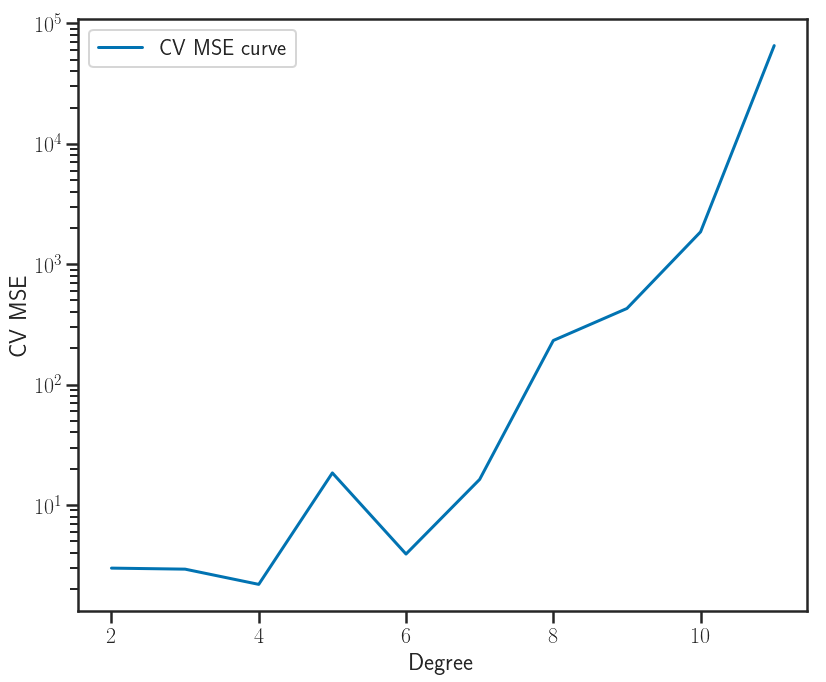

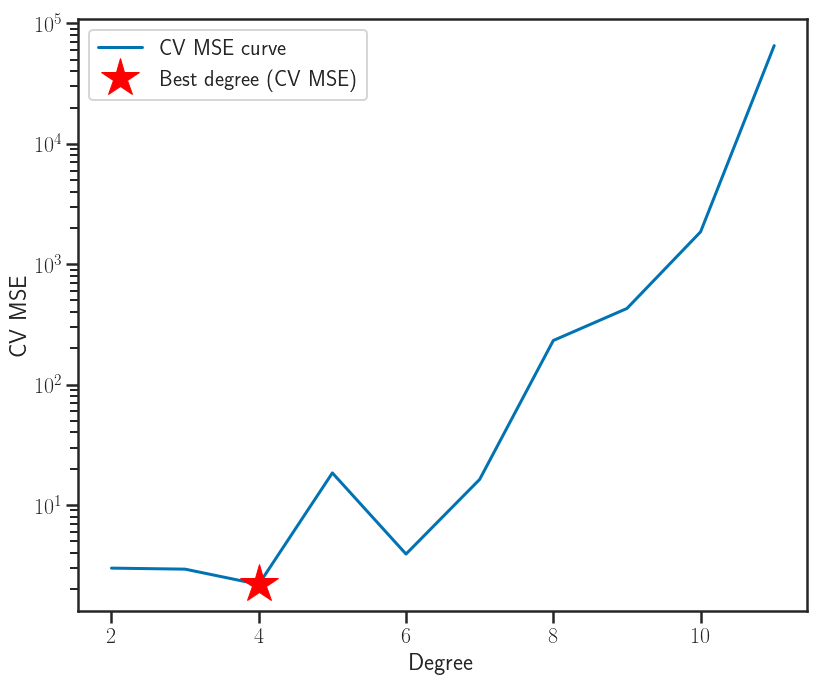

In [24]:
# On the importance of cross-validation

estimator = PolynomialRegression()
degrees = np.arange(2, 12)
cv_model = GridSearchCV(estimator, cv=5,
                        param_grid={'degree': degrees},
                        scoring='neg_mean_squared_error')
# Note: in scoring above, neg means -MSE
cv_model.fit(X, y)
mse = [-cv_score for cv_score in cv_model.cv_results_['mean_test_score']]
print(X.shape)
fig = plt.figure(figsize=figsize)
plt.semilogy(degrees, mse, label="CV MSE curve")
plt.xlabel('Degree')
plt.ylabel('CV MSE')
plt.legend(loc='upper left')
plt.tight_layout()

my_saving_display(fig, dirname, "CV_curve_polynomial", imageformat)

fig = plt.figure(figsize=figsize)
plt.semilogy(degrees, mse, label="CV MSE curve")
plt.xlabel('Degree')
plt.ylabel('CV MSE')
plt.legend(loc='upper left')
plt.tight_layout()
best_idx = np.argmax(cv_model.cv_results_['mean_test_score'])
best_deg = degrees[best_idx]
best_mse = -cv_model.cv_results_['mean_test_score'][best_idx]
plt.plot(best_deg, best_mse, "*r", markersize=40, label="Best degree (CV MSE)")
plt.legend(loc="upper left")
plt.tight_layout()

my_saving_display(fig, dirname, "CV_curve_and_best_polynomial", imageformat)
print(mse)

In [16]:
# XXX TODO: perform same analysis with CV on pipeline
# alternatively, onec can do it directly with sklearn:

model = make_pipeline(PolynomialFeatures(degree=6), LinearRegression())
y_pred = model.fit(X, y).predict(XX)

# Piecewise Constant fitting,
cf. http://www.science.smith.edu/~jcrouser/SDS293/labs/2016/lab12/Lab%2012%20-%20Polynomial%20Regression%20and%20Step%20Functions%20in%20Python.pdf

In [25]:
min_int = np.min(xx)
max_int = np.max(xx)
x_amplitude = np.array([min_int, max_int])

In [26]:
def my_bins(X_in, x_amplitude, cut):
    df_cut, bins = pd.cut(x_amplitude, cut, retbins=True, right=False)
    x = X_in.ravel()
    X = np.zeros([x.shape[0], cut])
    val_old = x_amplitude[0]
    for i, val in enumerate(bins[1:]):
        X[:, i] = np.logical_and(x >= val_old, x < val)
        val_old = val
    return X

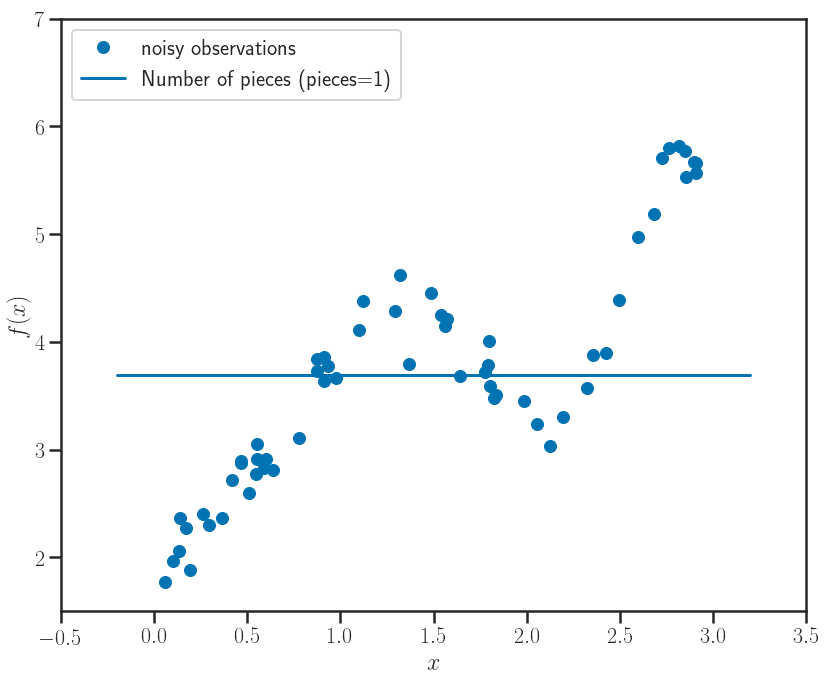

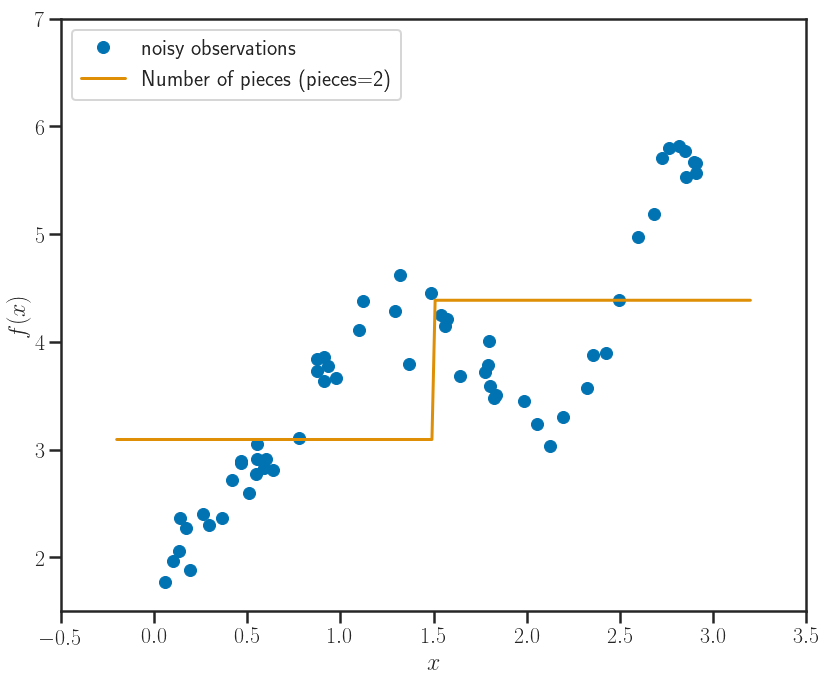

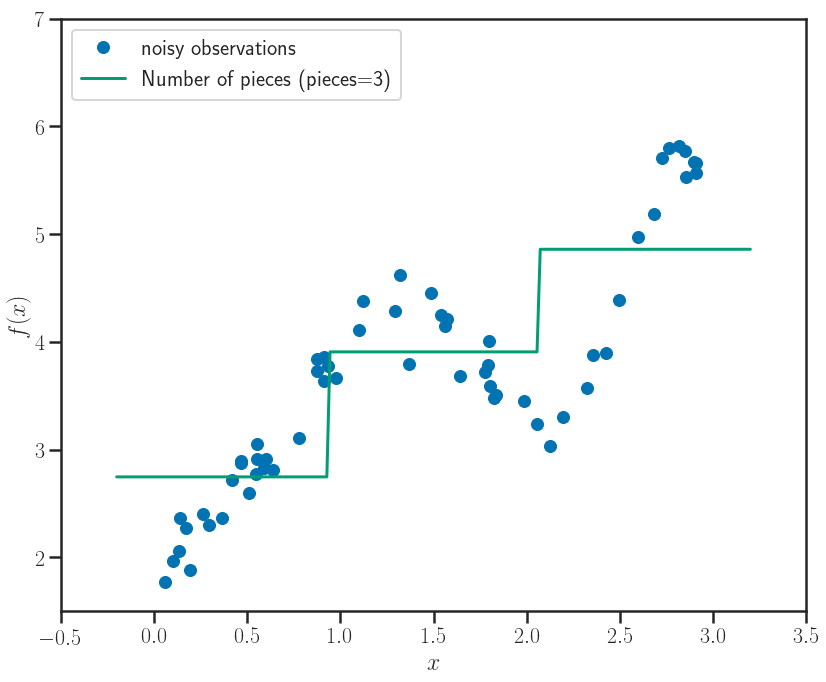

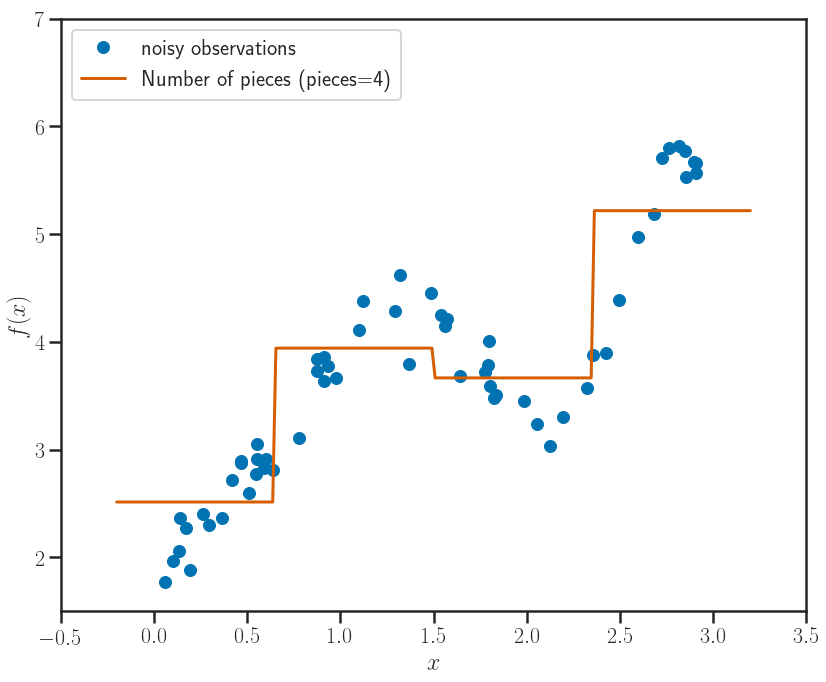

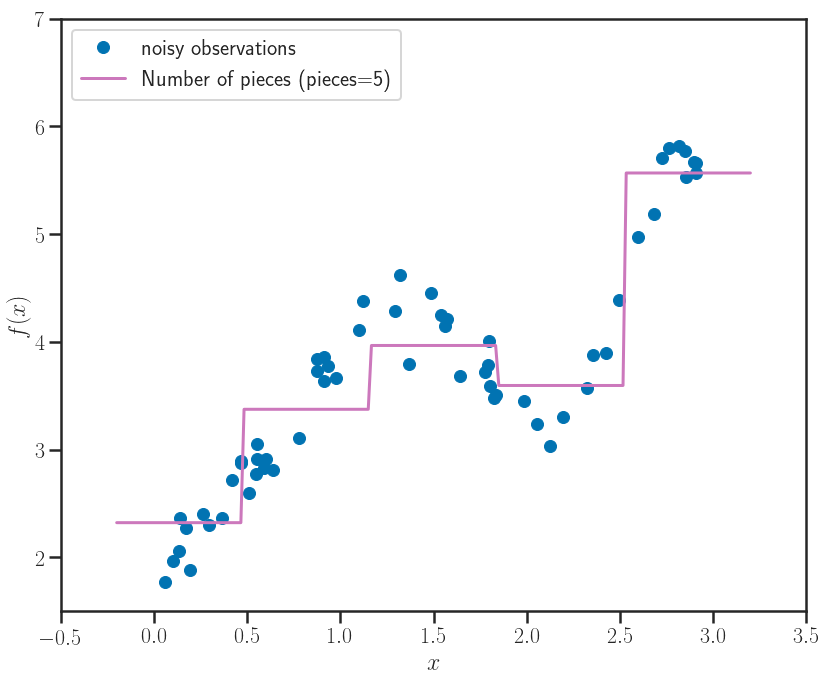

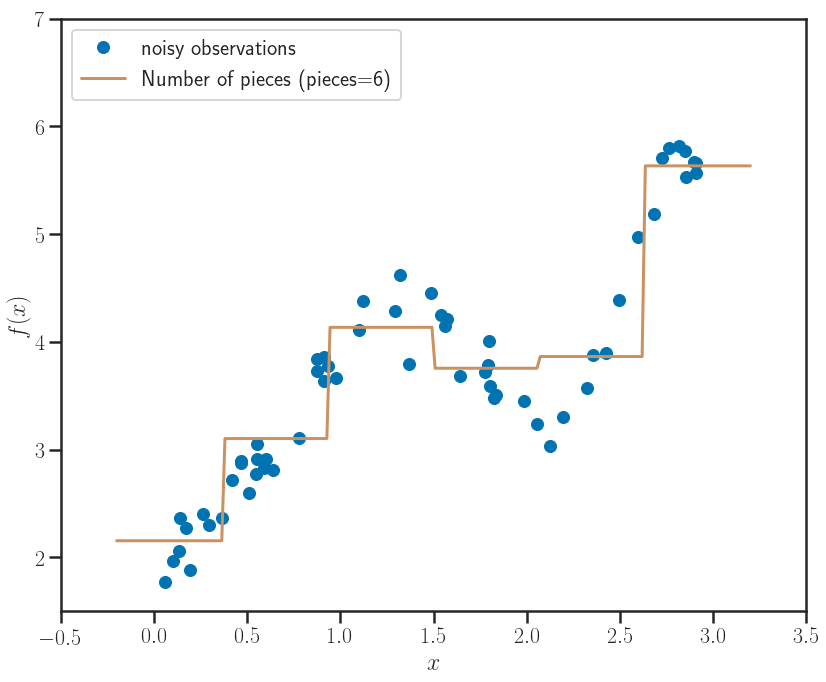

In [27]:
cuts = [1, 2, 3, 4, 5, 6]
colors = [2, 3, 4, 5, 6, 7]

for i, cut in enumerate(cuts):

    X_train = my_bins(X, x_amplitude, cut)
    ols = LinearRegression(fit_intercept=False)
    ols.fit(X_train, y)

    # Ordinary Least Square step:
    X_test = my_bins(XX, x_amplitude, cut)
    y_pred = ols.predict(X_test)

    # Display:
    fig = plt.figure(figsize=figsize)
    plt.plot(x, y, 'o', label="noisy observations")
    plt.plot(xx, y_pred, '-',
             color=sns.color_palette("colorblind", 8)[colors[i] - 2],
             label=r"Number of pieces (pieces={0})".format(cut))
    plt.xlabel('$x$')
    plt.ylabel('$f(x)$')
    plt.ylim([1.5, 7])
    plt.xlim([-.5, 3.5])
    plt.legend(loc='upper left')
    plt.tight_layout()
    my_saving_display(fig, dirname, "sin_signal_pw_cst" + str(cut),
                      imageformat)
plt.show()

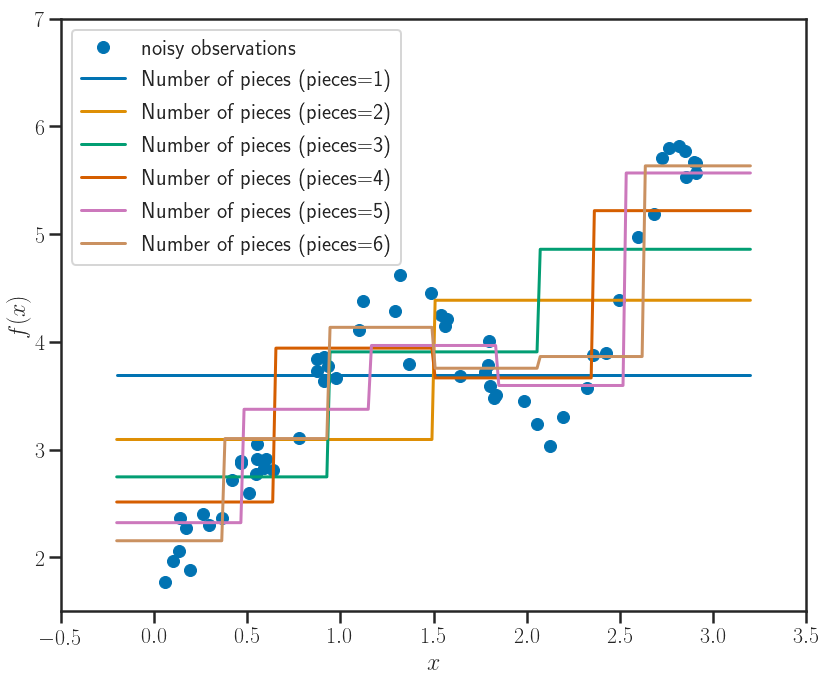

In [28]:
fig2 = plt.figure(figsize=figsize)
plt.plot(x, y, 'o', label="noisy observations")
for i, cut in enumerate(cuts):
    X_train = my_bins(X, x_amplitude, cut)
    ols = LinearRegression(fit_intercept=False)
    ols.fit(X_train, y)

    # Ordinary Least Square step:
    X_test = my_bins(XX, x_amplitude, cut)
    y_pred = ols.predict(X_test)

    plt.plot(xx, y_pred, '-',
             color=sns.color_palette("colorblind", 8)[colors[i] - 2],
             label=r"Number of pieces (pieces={0})".format(cut))
    plt.xlabel('$x$')
    plt.ylabel('$f(x)$')
    plt.ylim([1.5, 7])
    plt.xlim([-.5, 3.5])
    plt.legend(loc='upper left')
    plt.tight_layout()
plt.show()
my_saving_display(fig2, dirname, "sin_signal_pw_cst_all", imageformat)

In [29]:
class Biner(PolynomialFeatures):
    """ Create bined version of the data

    """

    def __init__(self, cut=2, min_int=min_int, max_int=max_int, copy=True):
        self.copy = copy
        self.min_int = min_int
        self.max_int = max_int
        self.cut = cut

    def fit(self, X, y=None):
        """Do nothing and return the estimator unchanged
        This method is just there to implement the usual API and hence
        work in pipelines.
        Parameters
        ----------
        X : array-like
        """
        return self

    def transform(self, X, y='deprecated', copy=None):
        """Binarize each element of X
        Parameters
        ----------
        X : {array-like, sparse matrix}, shape [n_samples, n_features]
            The data to binarize, element by element.
            scipy.sparse matrices should be in CSR format to avoid an
            un-necessary copy.
        y : (ignored)
            .. deprecated:: 0.19
               This parameter will be removed in 0.21.
        """
        x_amplitude = np.array([self.min_int, self.max_int])
        X_train = my_bins(X, x_amplitude, self.cut)
        return X_train

[1.7367277346807692, 1.7149842400191386, 1.8066046492030081, 0.8064883202302688, 1.9078895383881094, 1.6835962242912752]


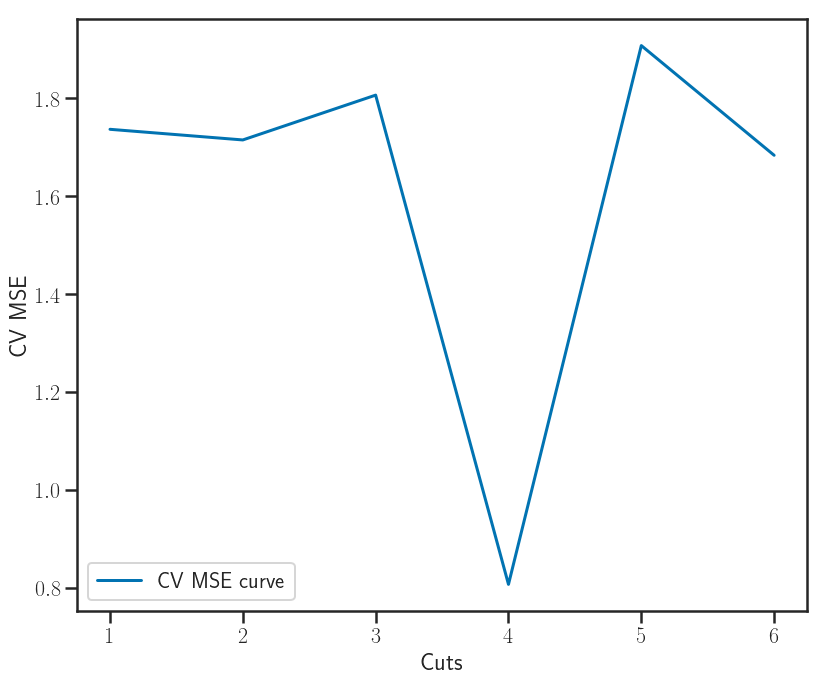

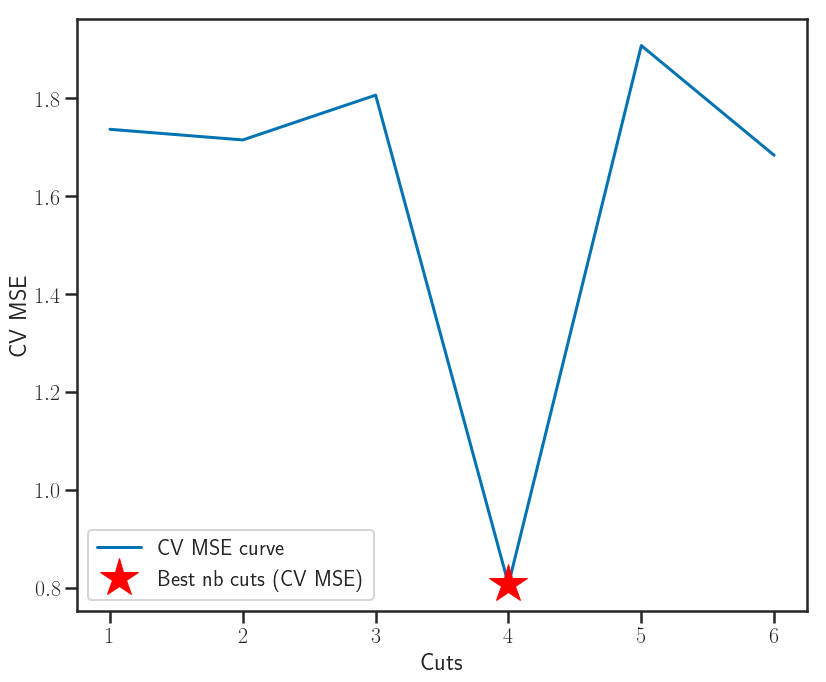

In [37]:
# On the importance of cross-validation: preprocess first

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

estimators = [('Binerazing', Biner()), ('clf', LinearRegression())]
pipe = Pipeline(estimators)
param_grid = dict(Binerazing__cut=cuts)
grid_search = GridSearchCV(pipe, param_grid=param_grid,
                           cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X, y)
mse = [-cv_score for cv_score in grid_search.cv_results_['mean_test_score']]
print(mse)
fig = plt.figure(figsize=figsize)
plt.plot(cuts, mse, label="CV MSE curve")
plt.xlabel('Cuts')
plt.ylabel('CV MSE')
plt.legend(loc='lower left')
plt.tight_layout()

my_saving_display(fig, dirname, "CV_curve_piecewise", imageformat)

fig = plt.figure(figsize=figsize)
plt.plot(cuts, mse, label="CV MSE curve")
plt.xlabel('Cuts')
plt.ylabel('CV MSE')
plt.legend(loc='lower left'  )
plt.tight_layout()

best_idx = np.argmin(mse)
best_cut = cuts[best_idx]
best_mse_piecewise = mse[best_idx]
plt.plot(best_cut, best_mse_piecewise, "*r",
         markersize=40, label="Best nb cuts (CV MSE)")
plt.legend(loc='lower left'  )
plt.tight_layout()
plt.show()

my_saving_display(fig, dirname, "CV_curve_and_best_piecewise", imageformat)

# SPLINE PART :
Beware sicpy needs the points to be in ascending order!!!

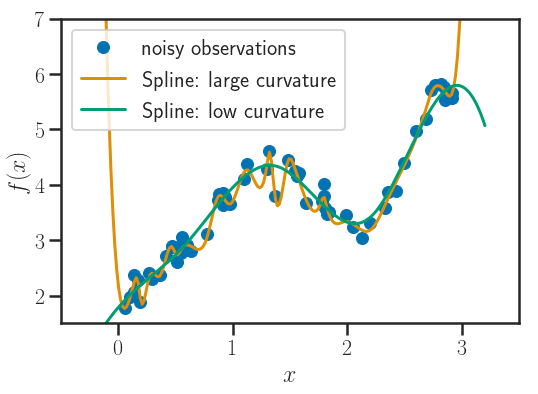

In [38]:
# Follow guidelines from:
# http://danielhnyk.cz/creating-your-own-estimator-scikit-learn/
# for creating an sklearn compatible class


class UnivariateSplineSmoother(LinearRegression):
    def __init__(self, s=4.):
        self.s = s

    def fit(self, x, y):
        self._spline = UnivariateSpline(x, y, s=self.s)
        return self

    def predict(self, x):
        return self._spline(x)


# large curvature means s is small
spline_smoother = UnivariateSplineSmoother(0.5).fit(x, y)
y_pred = spline_smoother.predict(xx)

# low curvature means s is large
spline_smoother = UnivariateSplineSmoother(2.).fit(x, y)
y_pred_bis = spline_smoother.predict(xx)

# Plotting Splines
fig = plt.figure(figsize=(8, 6))
plt.plot(x, y, 'o', label="noisy observations")
plt.plot(xx, y_pred, '-', label="Spline: large curvature")
plt.plot(xx, y_pred_bis, '-', label="Spline: low curvature")
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim([1.5, 7])
plt.xlim([-.5, 3.5])
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
my_saving_display(fig, dirname, "splines", imageformat)

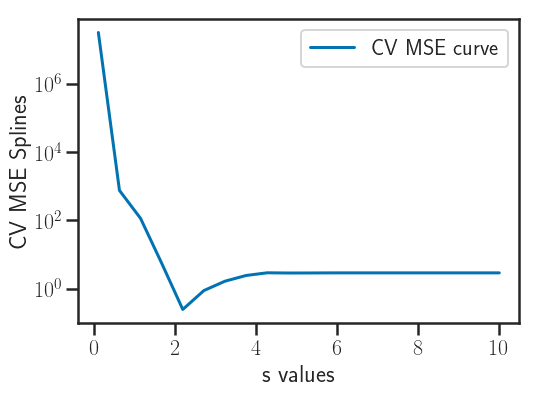

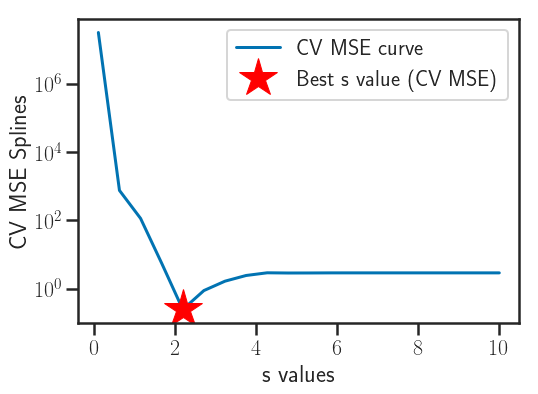

[31086531.659791484, 753.0531496044624, 114.44056175492184, 5.612534451755929, 0.24984386133649528, 0.8902049862283123, 1.6746412102712418, 2.456234441894481, 2.9445161986755153, 2.9029114695533336, 2.9101752770612737, 2.928117991793018, 2.9296193603906024, 2.9296193603906024, 2.9296193603906024, 2.9296193603906024, 2.9296193603906024, 2.9296193603906024, 2.9296193603906024, 2.9296193603906024]


In [39]:
estimator = UnivariateSplineSmoother()
s_values = np.linspace(0.1, 10, num=20)
cv_model_spl = GridSearchCV(estimator, cv=5,
                            param_grid={'s': s_values},
                            scoring='neg_mean_squared_error')
# Note: in scoring above, "neg_mean_squared_error" means -MSE
cv_model_spl.fit(x, y)

mse_spl = [-cv_score for cv_score in cv_model_spl.cv_results_['mean_test_score']]
fig = plt.figure(figsize=(8, 6))
plt.semilogy(s_values, mse_spl, label="CV MSE curve")
plt.xlabel('s values')
plt.ylabel('CV MSE Splines')
plt.legend()
plt.tight_layout()
my_saving_display(fig, dirname, "CV_curve_spline", imageformat)

fig = plt.figure(figsize=(8, 6))
plt.semilogy(s_values, mse_spl, label="CV MSE curve")
plt.xlabel('s values')
plt.ylabel('CV MSE Splines')
plt.legend()
plt.tight_layout()

best_idx_spline = np.argmax(cv_model_spl.cv_results_['mean_test_score'])
best_s_spline = s_values[best_idx_spline]
best_mse_spline = -cv_model_spl.cv_results_['mean_test_score'][best_idx_spline]
plt.plot(best_s_spline, best_mse_spline, "*r", markersize=40,
         label="Best s value (CV MSE)")
plt.legend()
plt.tight_layout()
plt.show()
my_saving_display(fig, dirname, "CV_curve_and_best_spline", imageformat)
print(mse_spl)

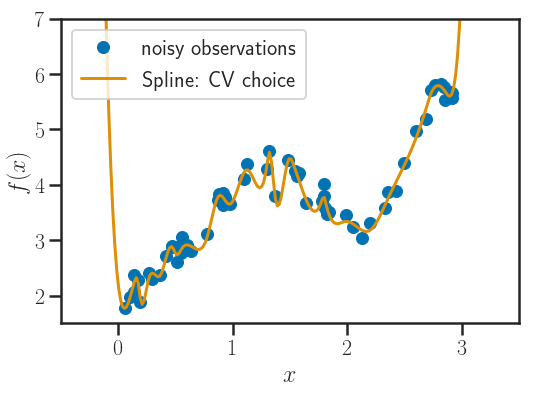

MSE Polynomials       = 2.1899671188676773
MSE PiecewiseConstant = 0.8064883202302688
MSE Spline            = 0.24984386133649528


In [33]:
# large curvature means s is large
y_pred_bis = cv_model_spl.predict(xx)

# Plotting Splines
fig = plt.figure(figsize=(8, 6))

plt.plot(xx, y_pred, '-', label="Spline: CV choice")
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim([1.5, 7])
plt.xlim([-.5, 3.5])
plt.legend(loc='upper left')
plt.tight_layout()
my_saving_display(fig, dirname, "best_spline_display", imageformat)
plt.show()

print("MSE Polynomials       = {0}".format(best_mse))
print("MSE PiecewiseConstant = {0}".format(best_mse_piecewise))
print("MSE Spline            = {0}".format(best_mse_spline))

# GAM PART

In [ ]:
class GeneralizedAdditiveRegressor(LinearRegression):
    """Fit Generalized Additive Model with backfitting"""

    def __init__(self, smoothers, max_iter=20):
        self.smoothers = smoothers
        self.max_iter = max_iter

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.y_mean_ = np.mean(y)

        residuals = y.copy()
        residuals -= self.y_mean_
        for i in range(self.max_iter):
            for j in range(n_features):
                if i > 0:
                    residuals += self.smoothers[j].predict(X[:, j])

                self.smoothers[j].fit(X[:, j], residuals)
                residuals -= self.smoothers[j].predict(X[:, j])
        return self

    def predict(self, X):
        n_samples, n_features = X.shape
        y = np.ones(n_samples) * self.y_mean_
        for j in range(n_features):
            y += self.smoothers[j].predict(X[:, j])
        return y


def f1(x):
    return np.cos(3 * x)


def f2(x):
    return x ** 3


def f3(x):
    return 3 * np.log(1 + np.abs(x))


def f_true(X):
    return f1(X[:, 0]) + f2(X[:, 1]) + f3(X[:, 2])


n_samples = 100

x1 = np.sort(2. * np.random.rand(n_samples) - 1.)
x2 = np.sort(2. * np.random.rand(n_samples) - 1.)
x3 = np.sort(2. * np.random.rand(n_samples) - 1.)

X = np.c_[x1, x2, x3]
y = f_true(X)
y += 0.1 * np.random.randn(n_samples)


s1 = 10 * np.var(y)
s2 = 10 * np.var(y)
s3 = 10 * np.var(y)
smoothers = [UnivariateSplineSmoother(s=s1), UnivariateSplineSmoother(s=s2),
             UnivariateSplineSmoother(s=s3)]
gam = GeneralizedAdditiveRegressor(smoothers, max_iter=200)
gam.fit(X, y)
y_pred = gam.predict(X)

In [ ]:
xx = np.linspace(-1, 1, 100)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 5),
                         sharex=True, sharey=True)

for j, (smoother, ax, f) in enumerate(zip(smoothers, axes.flat, [f1, f2, f3])):
    f_j = smoother.predict(xx)
    ax.plot(xx, f(xx) - np.mean(f(xx)), "--", label="true")
    ax.set_title("$x_{0}$".format(j + 1))
plt.ylim([-1.5, 1.5])
plt.xlim([-1., 1])
plt.tight_layout()
plt.legend(loc="upper left")
plt.show()
my_saving_display(fig, dirname, "GAM-true", imageformat)


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 5),
                         sharex=True, sharey=True)
for j, (smoother, ax, f) in enumerate(zip(smoothers, axes.flat, [f1, f2, f3])):
    f_j = smoother.predict(xx)
    ax.plot(xx, f(xx) - np.mean(f(xx)), "--", label="true")
    ax.plot(xx, f_j - np.mean(f_j), label="prediction")
    plt.ylim([-1.5, 1.5])
    plt.xlim([-1., 1])
    ax.set_title("$x_{0}$".format(j + 1))
plt.tight_layout()
plt.legend(loc="upper left")
plt.show()
my_saving_display(fig, dirname, "GAM-true-predict", imageformat)